# Plot all results

This notebook reads the result files from different models (contained in the ChestXrays/Plots/ folder) and plots the result tables with a colormap

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [16]:
resultsarray = ["/home/user1/PycharmProjects/ChestXrays/Plots/model_arnoweng/results.md",
                "/home/user1/PycharmProjects/ChestXrays/Plots/server_model_13000/results.md",
                "/home/user1/PycharmProjects/ChestXrays/Plots/server_model_26200/results.md",
                "/home/user1/PycharmProjects/ChestXrays/Plots/server_model_52600/results.md",
                "/home/user1/PycharmProjects/ChestXrays/Plots/server_model_72800/results.md",
                "/home/user1/PycharmProjects/ChestXrays/Plots/server_model_145600/results.md"]

test_names = ["no data augmentation", "horizontal flip", "5d rot, 3% trans, 3% scale", 
              "10d rot, 5% trans, 5% scale", "15d rot, 10% trans, 10% scale", "25d rot, 12% trans, 13% scale",
              "45d rot, 15% trans, 15% scale", "65d rot, 25% trans, 20% scale", "90d rot, 35% trans, 25% scale",
              "180d rot, 50% trans, 30% scale", 
              "no data augmentation Padchest", "5d rot, 3% trans, 3% scale Padchest", 
              "10d rot, 5% trans, 5% scale Padchest", "15d rot, 10% trans, 10% scale Padchest", 
              "25d rot, 12% trans, 13% scale Padchest", "45d rot, 15% trans, 15% scale Padchest", 
              "65d rot, 25% trans, 20% scale Padchest", "90d rot, 35% trans, 25% scale Padchest",
              "180d rot, 50% trans, 30% scale Padchest"]

model_names = ["arnoweng", "no data augmentation", "horizontal flip", "15d rot, 10% trans, 10% scale",
              "45d rot, 15% trans, 15% scale",
              "180d rot, 50% trans, 30% scale"]

pathologies = ["Atelectasis", "Consolidation", "Infiltration",
               "Pneumothorax", "Edema", "Emphysema", "Fibrosis", "Effusion", "Pneumonia",
               "Pleural_Thickening", "Cardiomegaly", "Nodule", "Mass", "Hernia"]

In [17]:
all_numbers = []
all_devs = []
all_pneumo_numbers = []
all_pneumo_devs = []

In [18]:
for model in range(len(model_names)):

    results = resultsarray[model]
    file = open(results, "r").read()

    end_indices = [m.start() for m in re.finditer("\+", file)]

    numbers = []
    devs = []
    for i in end_indices:
        numbers.append(float(file[i - 7:i]))
        devs.append(float(file[i + 3: i + 9]))

    numbers = np.array(numbers).reshape(-1, 14)
    devs = np.array(devs).reshape(-1, 14)

    all_numbers.append(numbers)
    all_devs.append(devs)

    # Compute mean

    numbers_mean = np.mean(numbers, axis=1)
    devs_mean = np.mean(devs, axis=1)

#     # add pneumonia dataset

#     pneumo_number = float(file[-17:-11])
#     pneumo_dev = float(file[-9:-3])
#     all_pneumo_numbers.append(pneumo_number)
#     all_pneumo_devs.append(pneumo_dev)

#     numbers_mean = np.insert(numbers_mean, 10, pneumo_number)
#     devs_mean = np.insert(devs_mean, 10, pneumo_dev)

In [19]:
#     sns.lineplot(data=numbers_mean, label=model_names[toto])
#     plt.fill_between(x=np.arange(11), y1=numbers_mean - devs_mean,
#                      y2=numbers_mean + devs_mean, alpha=0.3)
#
# plt.xlabel('data augmentation of test set')
# plt.ylabel('mean AUC')
# plt.title("Robustness of models trained with various data augmentation")
# plt.show()

all_numbers = np.array(all_numbers)
all_devs = np.array(all_devs)
# all_pneumo_numbers = np.array(all_pneumo_numbers)[:, None]
# all_pneumo_devs = np.array(all_pneumo_devs)[:, None]

In [20]:
all_numbers.shape

(6, 19, 14)

In [21]:
@interact(i=[(pathologies[k], k) for k in range(14)])
def plot_heatmap(i):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(all_numbers[:, :, i], cmap='RdYlGn')
    ax.set_xticks(np.arange(len(test_names)))
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_xticklabels(test_names)
    ax.set_yticklabels(model_names)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for k in range(len(model_names)):
        for j in range(len(test_names)):
            text = ax.text(j, k, round(all_numbers[k, j, i],2),
                           ha="center", va="center", color="k")

    ax.set_xlabel("Data augmentation on test set")
    ax.set_ylabel("Data augmentation on train set")
    ax.set_title("AUCs for the prediction of " + pathologies[i])
    fig.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='i', options=(('Atelectasis', 0), ('Consolidation', 1), ('Infiltrat…

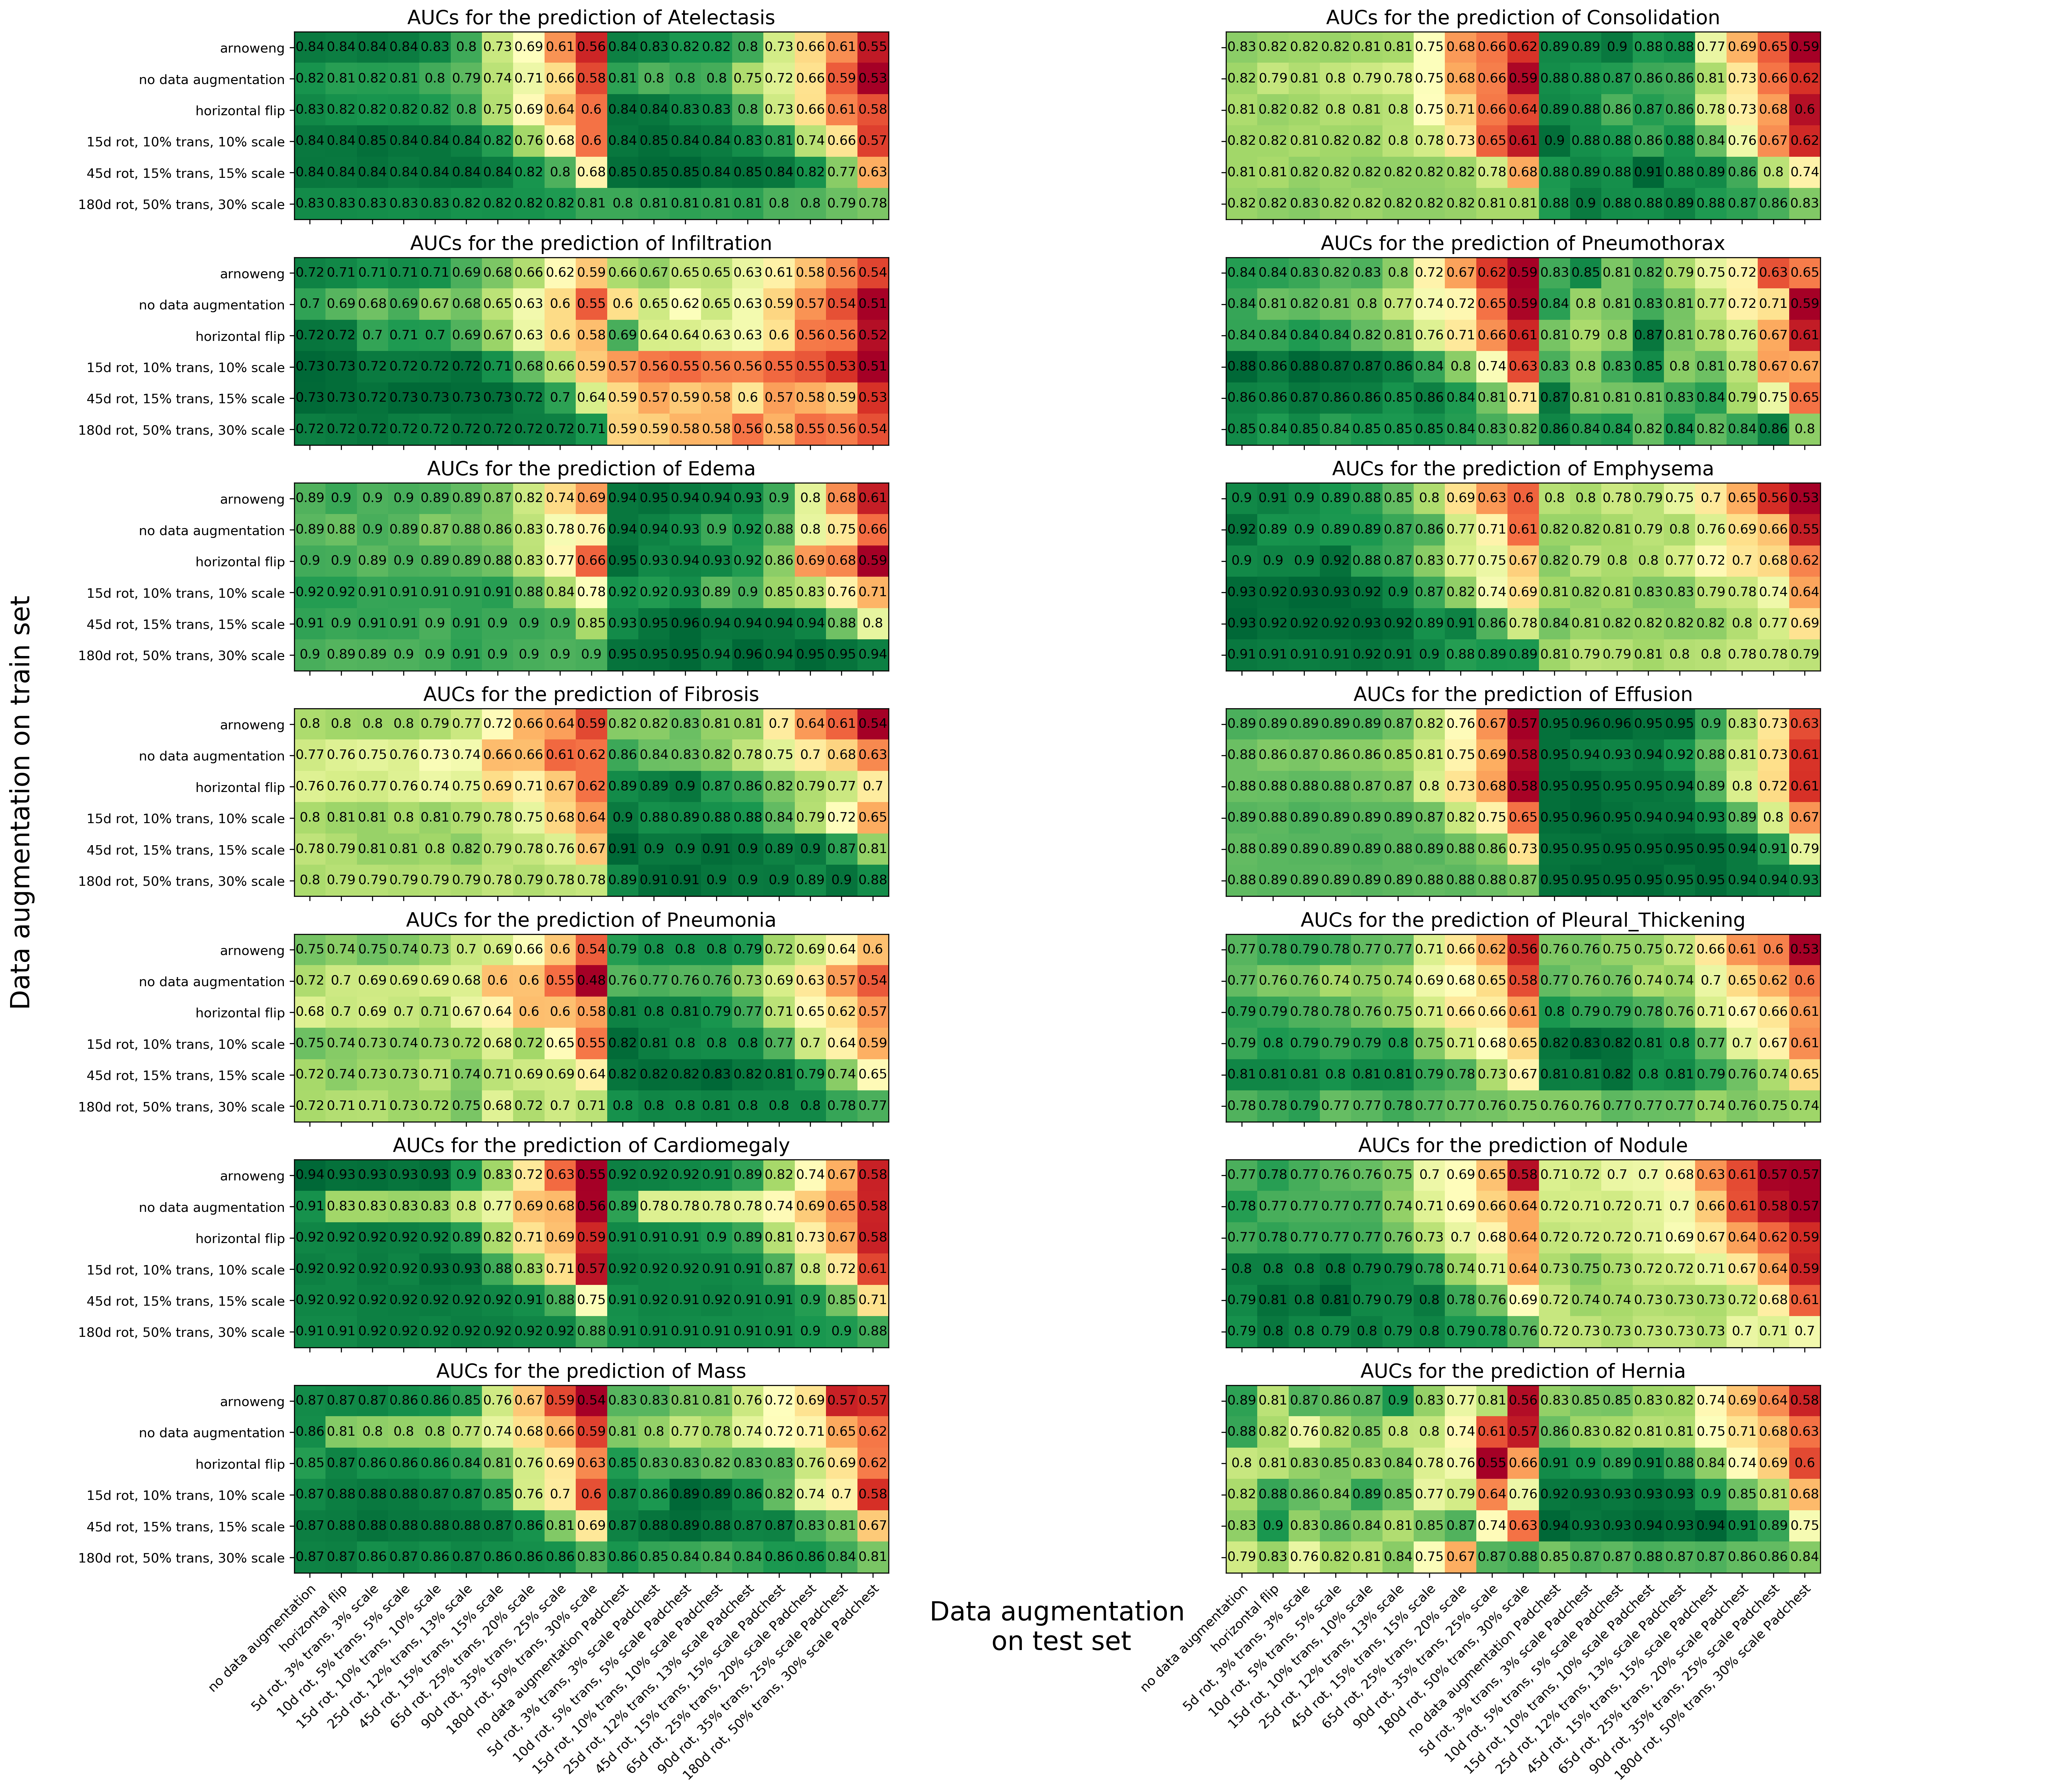

In [51]:
fig, axes = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(23,20), dpi=300)
for axe_i in range(axes.shape[0]):
    for axe_j in range(axes.shape[1]):
        i = axe_i * axes.shape[1] + axe_j
        axes[axe_i, axe_j].imshow(all_numbers[:, :, i], cmap='RdYlGn')
        axes[axe_i, axe_j].set_xticks(np.arange(len(test_names)))
        axes[axe_i, axe_j].set_yticks(np.arange(len(model_names)))
        axes[axe_i, axe_j].set_xticklabels(test_names)
        axes[axe_i, axe_j].set_yticklabels(model_names)
        plt.setp(axes[axe_i, axe_j].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for k in range(len(model_names)):
            for j in range(len(test_names)):
                text = axes[axe_i, axe_j].text(j, k, round(all_numbers[k, j, i],2),
                               ha="center", va="center", color="k")
                
        axes[axe_i, axe_j].set_title("AUCs for the prediction of " + pathologies[i], fontsize=15)
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Data augmentation\n on test set", fontsize=20)
plt.ylabel("Data augmentation on train set", fontsize=20)
fig.tight_layout()
plt.show()